In [6]:
# library(tidyverse)
# library(repr)
# #library(readxl)
# library(tidymodels)
# #library(ggplot2)
# #install.packages("ggplot2")

library(tidyverse)
library(repr)
library(tidymodels)
library(rsample)
options(repr.matrix.max.rows = 6)
install.packages("ggplot2")
library(ggplot2)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



Introduction

Chest pain, also known as angina, is a condition characterized by blockages in the blood vessels leading to one’s heart. Four types of these chest pains include typical angina, atypical angina, non-anginal pain and asymptomatic. Typical angina is a substernal chest pain caused by physical exertion or stress while atypical angina is distinguished as epigastric pain (AlBadri et.al., 2017). In addition, non-anginal pain is attributed to chest pain not attributed to an underlying heart disease and asymptomatic chest pain is a temporary change in blood flow to the heart without typical chest pain (Rahel et.al., 2018). Whilst similar, these four chest pains have different solutions for each that make it important to distinguish between them. Many studies have show that age, unhealthy eating patterns, stress and more are all accompanied with a greater risk of experiencing angina (“Causes and Risk Factors”). 


 Although these chest pains are all uniquely different, there are overlapping symptoms, such as shortness of breath and intense pain that make it difficult to distinguish between them. Thus, to conduct our data analysis the variables from the dataset can be utilized to determine which chest pain is more likely to occur when certain predictors exist in the human body. These predictors include age, resting blood sugar, cholesterol, maximum heart rate, ST depression and number of major blood vessels. The heart disease data set, which goal is to show presence of heart disease in the patient, will be where the preditors are taken from. The chest pain types will be distingused in the data set by setting typical angina as type 1, aytpical as type 2, non-anginal as type 3 and asymptomatic as type 4. 
 *Add significance of each predictor*


Question: What type of chest pain is most likely to occur based on their age, resting blood sugar, cholesterol, maximum heart rate, ST depression and number of major blood vessels? vessels? 

In [3]:
hungry <- read.csv("data/processed.hungarian.data", header = FALSE)

colnames(hungry) <- c("age", 'sex', 'chest_pain_type', 'resting_bps', 'cholestoral', 'fasting_blood_sugar', 'rest_ecg', 'max_heartrate', 'excercise_angina', 'depression', 'slope', 'major_vessels', 'thal', 'heart_disease')
hungry[hungry == "?"] <- NA


#hw1 coding team: visualize data (ggpair)?, wrangle, make training and testing data, split training and testing data
# replace '?' to na

# hungry_clean <- hungry |>
#     select(-sex, -excercise_angina, -depression, -slope, -major_vessels, -thal, -rest_ecg, -fasting_blood_sugar) #|>
#    # replace_with_na(replace = list(cholestoral = "?")
#age cp resting_bps cho max_ heart_d

hungry


hungry_no_NA <- hungry |>
    select(age, chest_pain_type, resting_bps, cholestoral, max_heartrate, heart_disease) |>
    na.omit()
hungry_no_NA

hungry_select <- hungry_no_NA |>
    
    mutate(scaled_age = scale(age, center = TRUE), 
        scaled_rbps = scale(as.integer(resting_bps), center = TRUE),
        scaled_chol = scale(as.integer(cholestoral), center = TRUE),
        scaled_mhr = scale(as.integer(max_heartrate), center = TRUE),
        scaled_hd = scale(heart_disease, center = TRUE))
hungry_select

hungry_split <- initial_split(hungry, prop = 3/4, strata = chest_pain_type)
hungry_training <- training(hungry_split)
hungry_testing <- testing(hungry_split)




age,sex,chest_pain_type,resting_bps,cholestoral,fasting_blood_sugar,rest_ecg,max_heartrate,excercise_angina,depression,slope,major_vessels,thal,heart_disease
<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<int>
28,1,2,130,132,0,2,185,0,0,NA,NA,NA,0
29,1,2,120,243,0,0,160,0,0,NA,NA,NA,0
29,1,2,140,NA,0,0,170,0,0,NA,NA,NA,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
56,1,4,155,342,1,0,150,1,3,2,NA,NA,1
58,0,2,180,393,0,0,110,1,1,2,NA,7,1
65,1,4,130,275,0,1,115,1,1,2,NA,NA,1


,age,chest_pain_type,resting_bps,cholestoral,max_heartrate,heart_disease
,<int>,<int>,<chr>,<chr>,<chr>,<int>
1,28,2,130,132,185,0
2,29,2,120,243,160,0
4,30,1,170,237,170,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮
292,56,4,155,342,150,1
293,58,2,180,393,110,1
294,65,4,130,275,115,1


,age,chest_pain_type,resting_bps,cholestoral,max_heartrate,heart_disease,scaled_age,scaled_rbps,scaled_chol,scaled_mhr,scaled_hd
,<int>,<int>,<chr>,<chr>,<chr>,<int>,"<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>"
1,28,2,130,132,185,0,-2.534319,-0.1417069,-1.7525645,1.9519695,-0.7716344
2,29,2,120,243,160,0,-2.406180,-0.7110651,-0.1128181,0.8875169,-0.7716344
4,30,1,170,237,170,0,-2.278040,2.1357259,-0.2014530,1.3132979,-0.7716344
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
292,56,4,155,342,150,1,1.053593,1.2816886,1.3496585,0.4617359,1.291151
293,58,2,180,393,110,1,1.309873,2.7050841,2.1030555,-1.2413883,1.291151
294,65,4,130,275,115,1,2.206851,-0.1417069,0.3599016,-1.0284977,1.291151


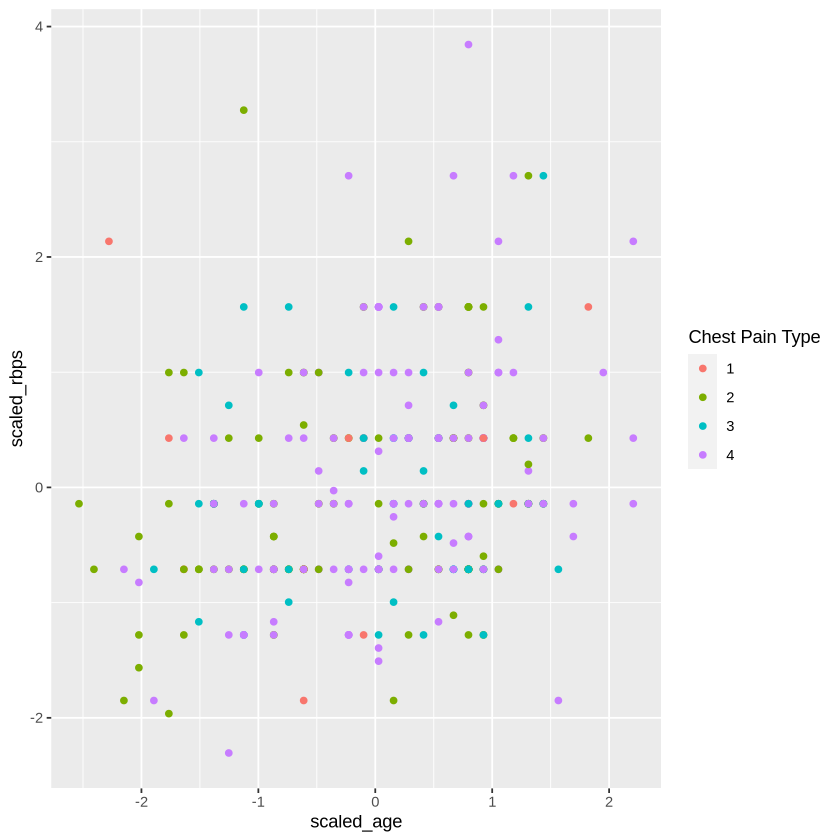

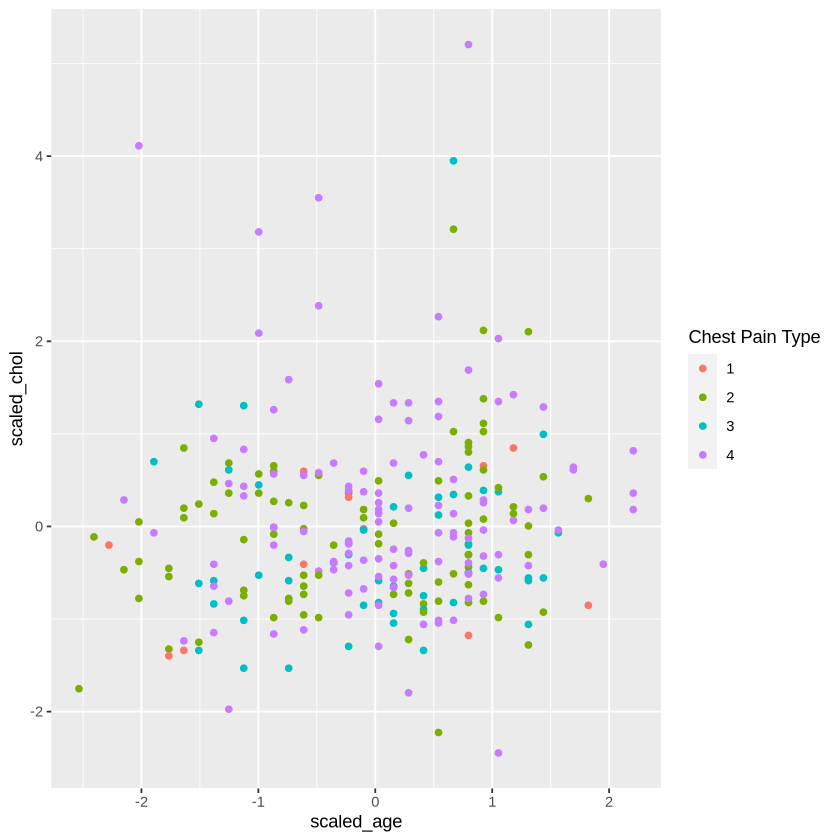

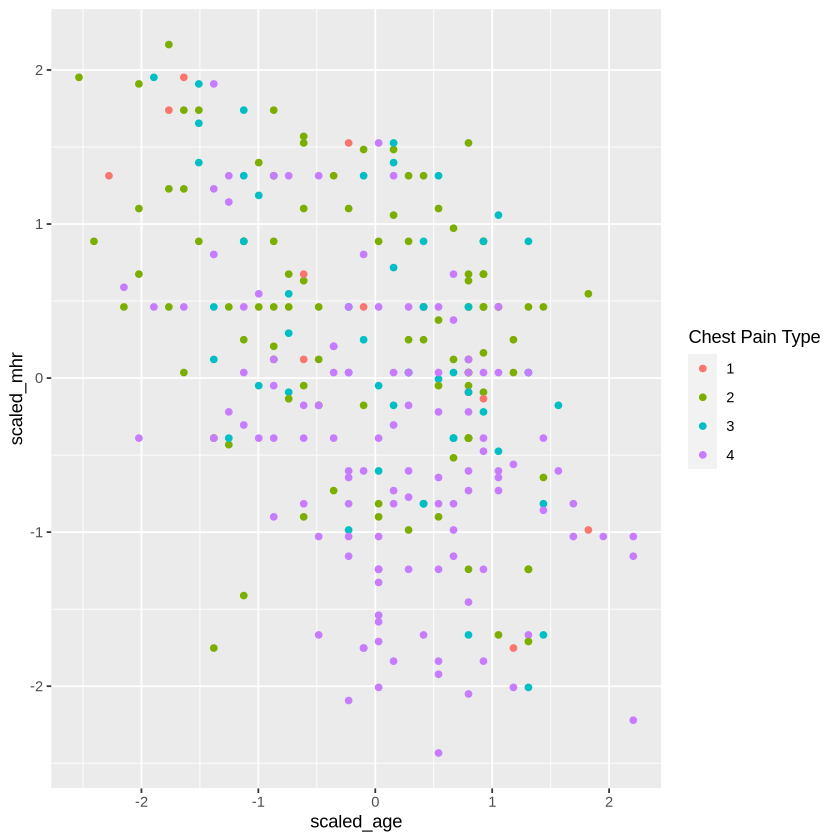

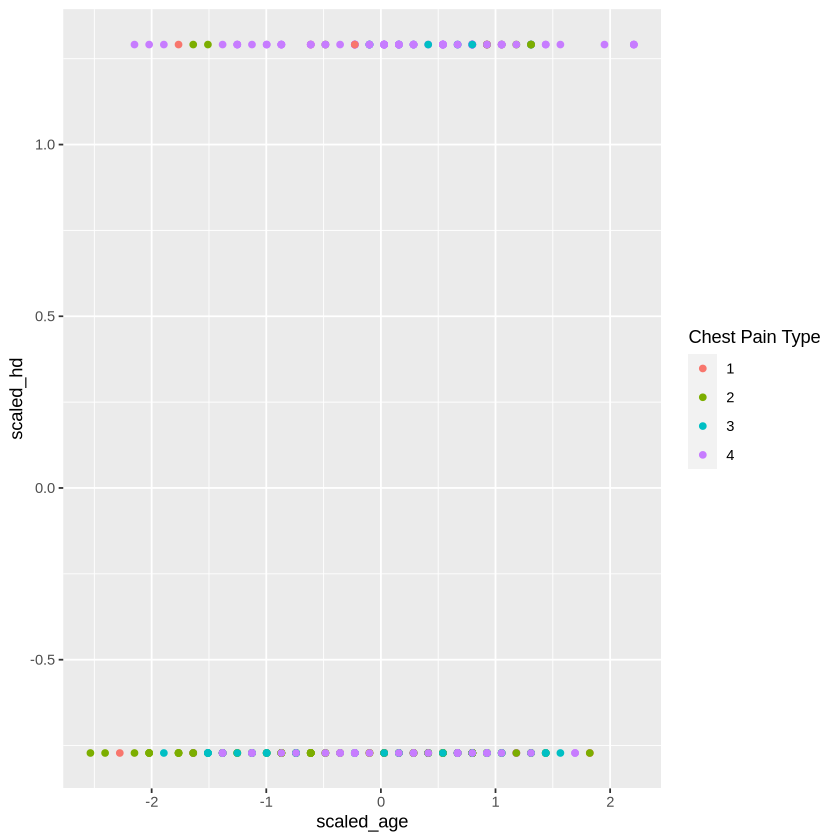

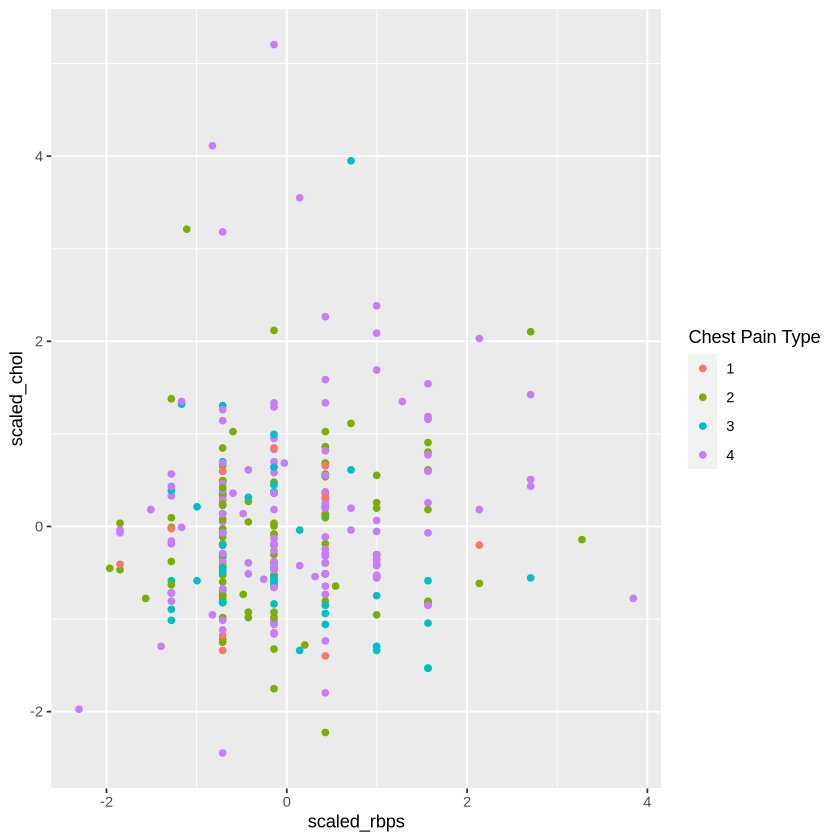

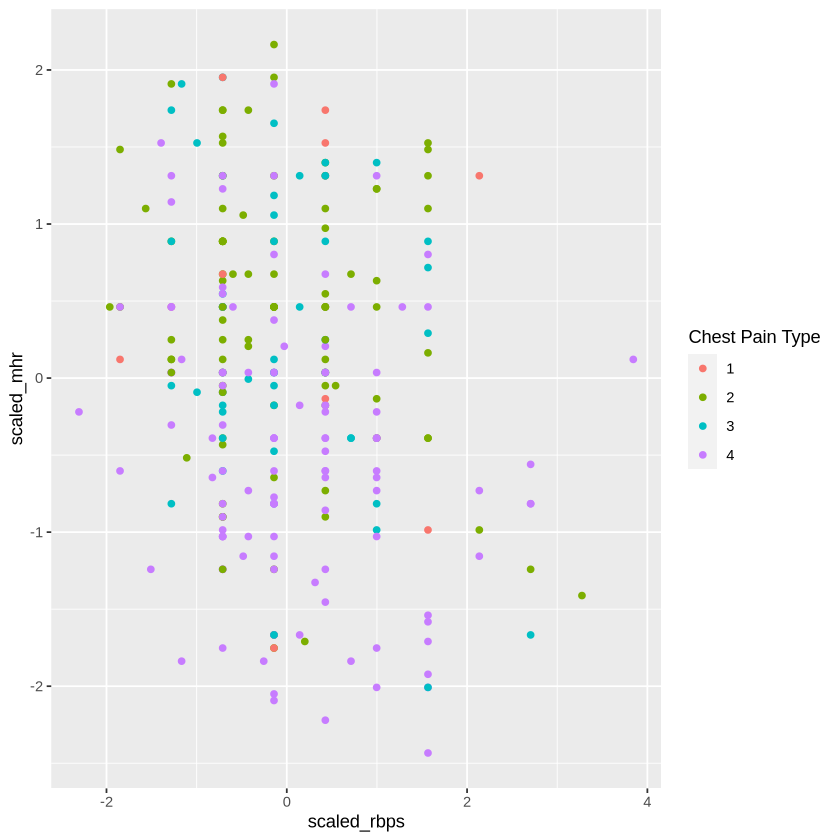

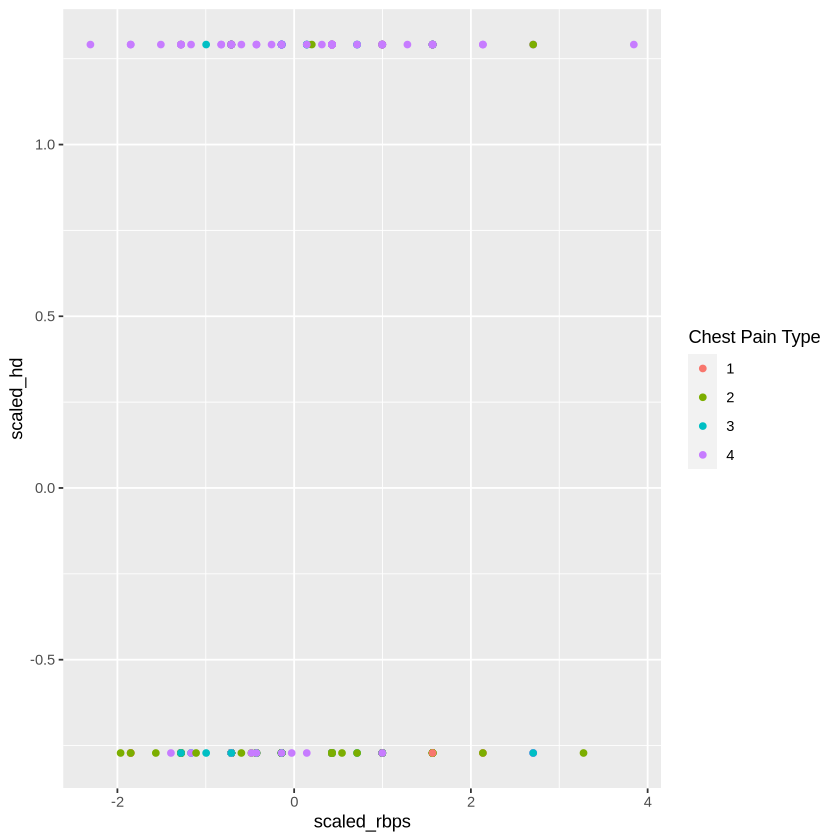

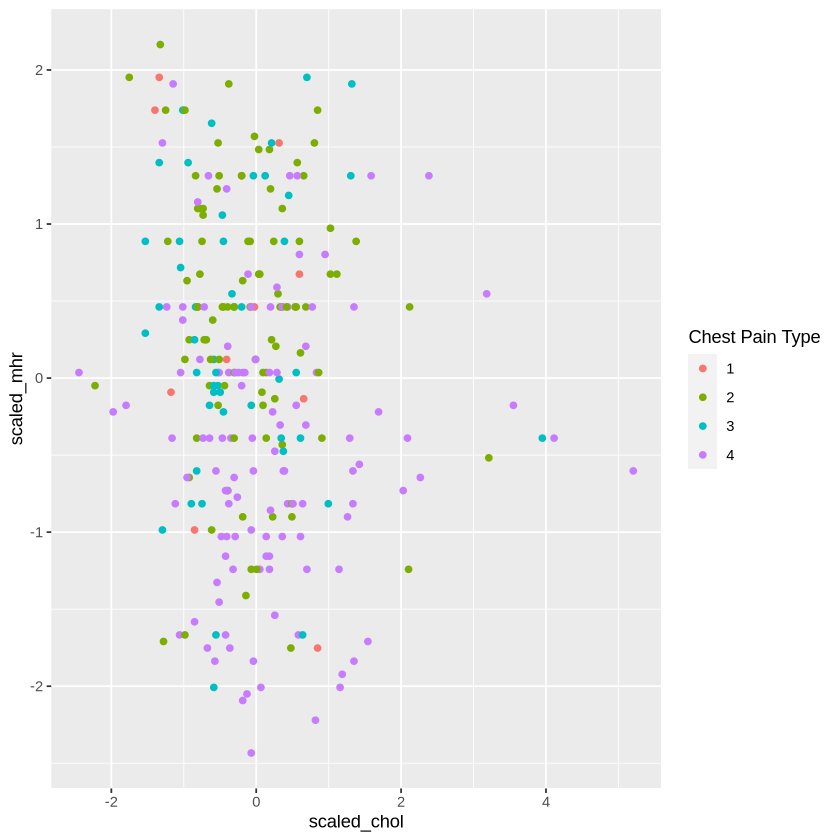

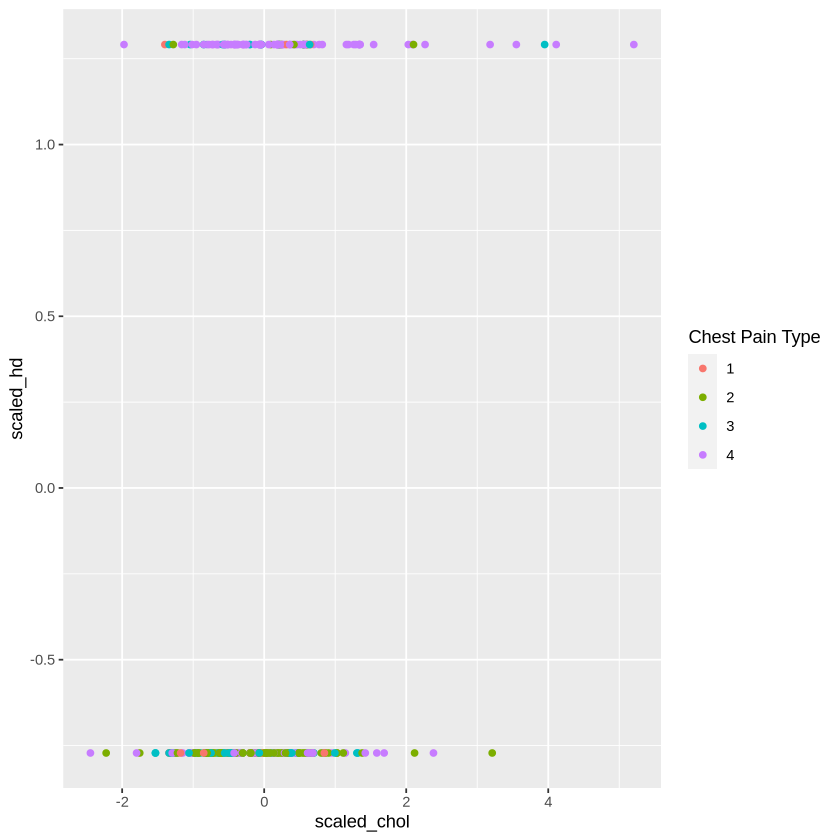

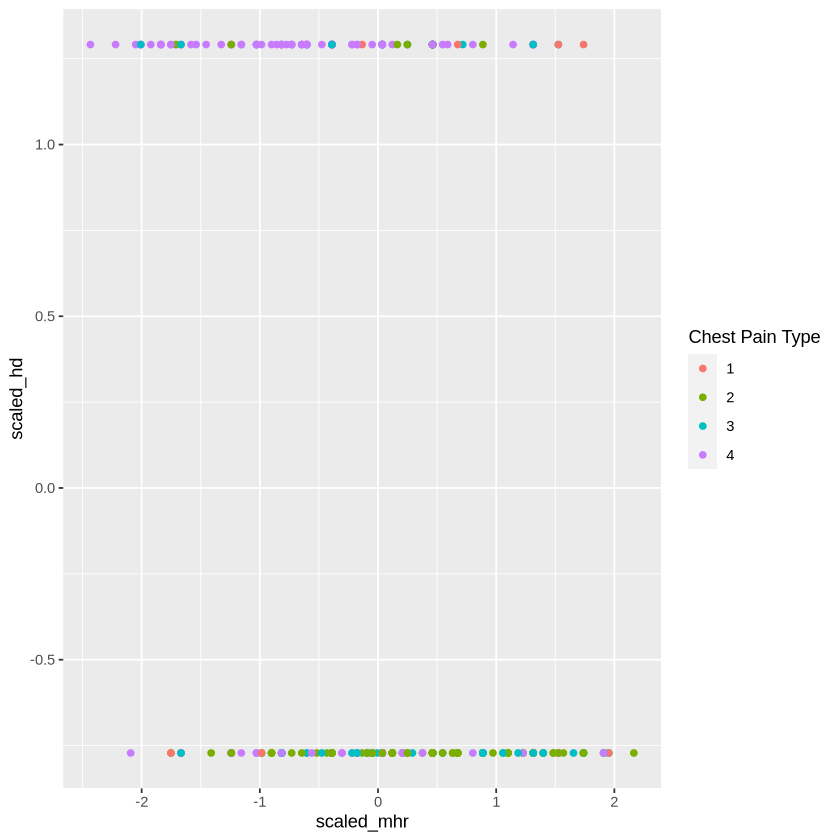

In [4]:
p_age1 <- ggplot(hungry_select, aes(x = scaled_age, y= scaled_rbps, color = as_factor(chest_pain_type))) +
  geom_point() +
  labs(color = "Chest Pain Type")
p_age1

p_age2 <- ggplot(hungry_select, aes(x = scaled_age, y= scaled_chol, color = as_factor(chest_pain_type))) +
  geom_point() +
  labs(color = "Chest Pain Type")
p_age2

p_age3 <- ggplot(hungry_select, aes(x = scaled_age, y= scaled_mhr, color = as_factor(chest_pain_type))) +
  geom_point() +
  labs(color = "Chest Pain Type")
p_age3

p_age4 <- ggplot(hungry_select, aes(x = scaled_age, y= scaled_hd, color = as_factor(chest_pain_type))) +
  geom_point() +
  labs(color = "Chest Pain Type")
p_age4

p_rbps1 <- ggplot(hungry_select, aes(x = scaled_rbps, y= scaled_chol, color = as_factor(chest_pain_type))) +
  geom_point() +
  labs(color = "Chest Pain Type")
p_rbps1

p_rbps2 <- ggplot(hungry_select, aes(x = scaled_rbps, y= scaled_mhr, color = as_factor(chest_pain_type))) +
  geom_point() +
  labs(color = "Chest Pain Type")
p_rbps2

p_rbps3 <- ggplot(hungry_select, aes(x = scaled_rbps, y= scaled_hd, color = as_factor(chest_pain_type))) +
  geom_point() +
  labs(color = "Chest Pain Type")
p_rbps3

p_chol1 <- ggplot(hungry_select, aes(x = scaled_chol, y= scaled_mhr, color = as_factor(chest_pain_type))) +
  geom_point() +
  labs(color = "Chest Pain Type")
p_chol1

p_chol2 <- ggplot(hungry_select, aes(x = scaled_chol, y= scaled_hd, color = as_factor(chest_pain_type))) +
  geom_point() +
  labs(color = "Chest Pain Type")
p_chol2

p_mhr1 <- ggplot(hungry_select, aes(x = scaled_mhr, y= scaled_hd, color = as_factor(chest_pain_type))) +
  geom_point() +
  labs(color = "Chest Pain Type")
p_mhr1